

- Apply transpose convolution in practical scenarios using Keras.  

- Create, compile, train, and evaluate the model 

- Visualize the results  

##### Prerequisites: 

- Basic understanding of Python programming 

- Familiarity with convolutional neural network (CNN) concepts 

- Keras and TensorFlow installed 




#### Steps: 
**Step 1: Import Necessary Libraries**

Before you start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`. 


In [1]:
import warnings
warnings.simplefilter('ignore')

!pip install tensorflow

!pip install matplotlib 
import tensorflow as tf 

from tensorflow.keras.models import Model 

from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D 

import numpy as np 

import matplotlib.pyplot as plt 

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.5-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.10.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached wrapt-2.1.1-cp313-cp313-win_amd64.whl.metadata (7.6 kB)
  Using cache

**Explanation:**

 `tensorflow` is the main library for machine learning in Python. 

  `Model, Input, Conv2D, and Conv2DTranspose` are used to create and manipulate the layers in your model. 

  `numpy` and `matplotlib` are used for data manipulation and visualization. 

 
**Step 2: Define the Input Layer**

You need to define the input shape for your model. For simplicity, let's assume you are working with an input image of size 28x28 with 1 channel (grayscale). 

 


In [2]:
input_layer = Input(shape=(28, 28, 1))

**Explanation:**

`Input(shape=(28, 28, 1))` creates an input layer that expects 28x28 grayscale images.


**Step 3: Add convolutional and transpose convolutional layers**

You will add a convolutional layer to extract features, followed by a transpose convolution layer to reconstruct the image. 


In [3]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer) 

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer) 


**Explanation:**

`Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')` creates a convolution layer with 32 filters. 

`Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')` creates a transpose convolution layer for reconstructing the image. 

**Step 4: Create the Model**

Now, you will create the model by specifying the input and output layers.


In [4]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

**Explanation:**

`Model(inputs=input_layer, outputs=transpose_conv_layer)` creates a Keras model that connects the input layer to the output layer through the convolutional and transpose convolutional layers.  

**Step 5: Compile the Model**

Before training the model, you need to compile it. You will specify the loss function, optimizer, and evaluation metrics. 


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Explanation:**

- optimizer=`adam` specifies the Adam optimizer. 

- loss=`binary_crossentropy` specifies the binary cross-entropy loss function, suitable for binary pixel classification.  


**Step 6: Train the Model**

You can now train the model on some training data. For this example, let's assume X_train is our training input data.


In [6]:
# Generate synthetic training data 

X_train = np.random.rand(1000, 28, 28, 1) 

y_train = X_train # For reconstruction, the target is the input 

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0696 - val_loss: 0.0568
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0440 - val_loss: 0.0312
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - val_loss: 0.0156
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 - val_loss: 0.0084
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - val_loss: 0.0054
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0021


**Explanation:**

- X_train is a placeholder for your actual training data. 

- y_train is the same as X_train for image reconstruction. 

- model.fit trains the model for a specified number of epochs and batch size.

  
**Step 7: Evaluate the Model**

After training, you can evaluate the model on test data to see how well it performs. 


In [7]:
 # Generate synthetic test data 

X_test = np.random.rand(200, 28, 28, 1) 

y_test = X_test 

loss = model.evaluate(X_test, y_test) 

print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 
Test loss: 0.0021357606165111065


**Explanation:**

`X_test` and `y_test` are placeholders for your actual test data. 

`model.evaluate` computes the loss of the model on test data. . 

**Step 8: Visualize the Results**

To better understand the model's performance, let's visualize some reconstructed images.  


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


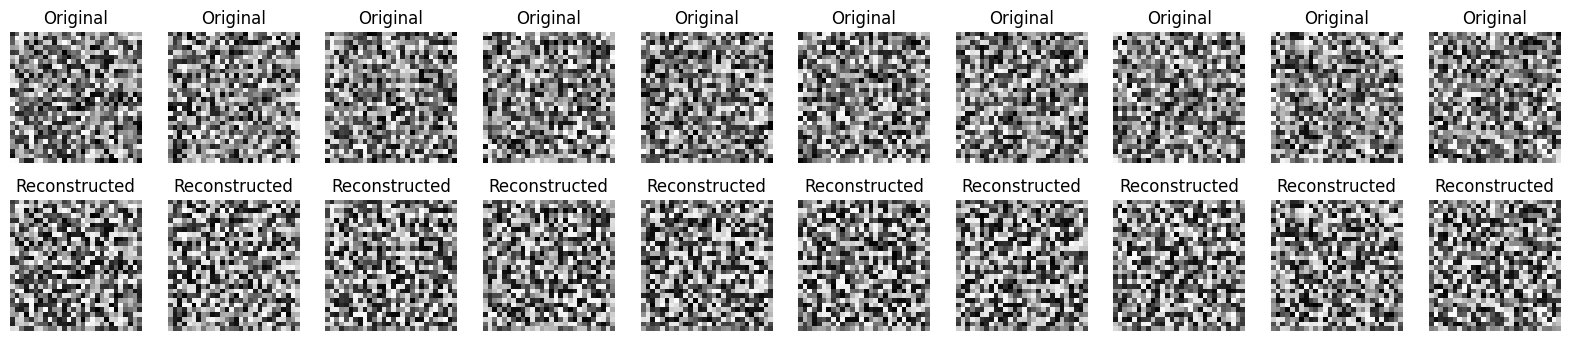

In [8]:
# Predict on test data 
y_pred = model.predict(X_test) 

# Plot some sample images 

n = 10 # Number of samples to display 

plt.figure(figsize=(20, 4))

for i in range(n): 

    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show() 

**Explanation:**

`model.predict` generates predictions for the test data. 

`plt.imshow` visualizes the original and reconstructed images side by side for comparison. 


### Practice exercises


#### Exercise 1: Experiment with Different Kernel Sizes 

**Objective:** Understand the impact of different kernel sizes on the model's performance. 

**Instructions:**
1. Modify the kernel size of the `Conv2D` and `Conv2DTranspose` layers. 
2. Recompile, train, and evaluate the model. 
3. Observe and record the differences in performance.


In [9]:
# Write your code here


from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661 - val_loss: 0.0467
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - val_loss: 0.0183
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - val_loss: 0.0070
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0024
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 
Test loss: 0.002375463955104351


<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


#### Exercise 2: Add Dropout Layers

**Objective:** Add dropout layers to prevent overfitting.

**Instructions:**
1. Add dropout layers after the convolutional layer. 
2. Set the dropout rate to 0.5.
3. Recompile, train, and evaluate the model.


In [10]:
# Write your code here

from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0768 - val_loss: 0.0627
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0545 - val_loss: 0.0414
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0372 - val_loss: 0.0257
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 - val_loss: 0.0160
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - val_loss: 0.0105
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - val_loss: 0.0076
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - val_loss: 0.0060
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - val_loss: 0.0049
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - val_loss: 0.0040
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - val_loss: 0.0035
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 
Test loss: 0.003437720937654376


<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')


#### Exercise 3: Use Different Activation Functions 

**Objective:** Experiment with different activation functions and observe their impact on model performance. 

**Instructions:**
1. Change the activation function of the convolutional and transpose convolutional layers to `tanh`. 
2. Recompile, train, and evaluate the model.


In [11]:
# Write your code here

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1740 - val_loss: 0.0840
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0597 - val_loss: 0.0430
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0332 - val_loss: 0.0246
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 - val_loss: 0.0150
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - val_loss: 0.0103
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - val_loss: 0.0079
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0051
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 
Test loss: 0.005123341456055641


<details>
<summary>Click here for solution</summary> </br>

```python

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

